In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results, how='outer' )

# Display the data table for preview
data_combined.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Checking the number of mice.
mice = combined_data['Mouse ID'].value_counts()

In [7]:
mice

g989    13
z969    10
c402    10
t198    10
a262    10
        ..
x336     1
u153     1
b447     1
t573     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [20]:
## calcule the number of the mice
len(mice)

249

In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_id=pd.DataFrame(duplicate_mice)
all_duplicate_mouse_id

,0
0,g989


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data['Mouse ID'].isin(duplicate_mice) == False]

In [24]:
# Checking the number of mice in the clean DataFrame.
clean_df = clean_df['Mouse ID'].value_counts()


In [25]:
clean_mice_number = len(clean_df)

In [26]:
clean_mice_number

248

## Summary Statitics

In [30]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_mean = combined_data.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean


regimen_median = combined_data.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median


regimen_variance = combined_data.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance


regimen_std = combined_data.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = combined_data.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [32]:
## Display the summary statistic table 
summary_stat= pd.DataFrame({
    "Mean" : regimen_mean,
    "Median" : regimen_median,
    "Variance" : regimen_variance,
    "STD" : regimen_std,
    "SEM" : regimen_sem
})

summary_stat

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Chart

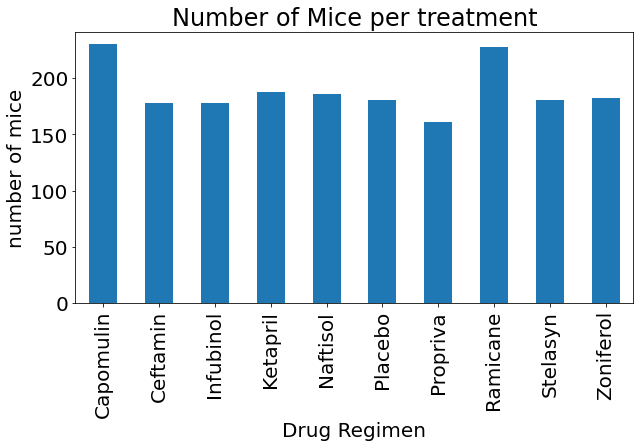

In [85]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_num_measure = combined_data.groupby(['Drug Regimen']).count()['Mouse ID']

plot_pd = total_num_measure.plot.bar(figsize=(10,5))
total_num_measure

plt.xlabel("Drug Regimen")
plt.ylabel("number of mice")
plt.title("Number of Mice per treatment")

plt.show()

In [39]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

mice_list =(combined_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

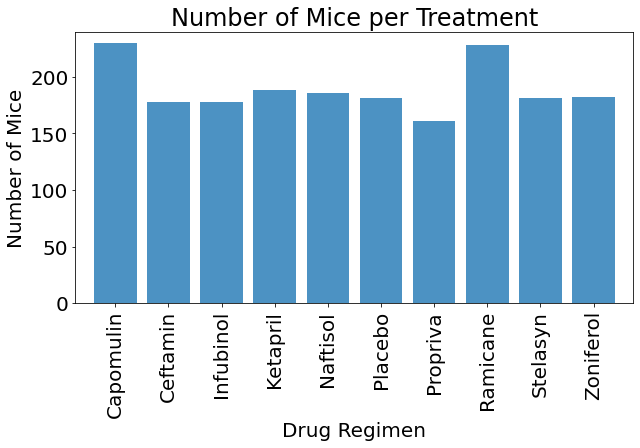

In [84]:
x_axis = np.arange(len(total_num_measure))
fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.bar(x_axis, mice_list, alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
## Group by Gender
group_by_gender = combined_data.groupby(["Mouse ID", "Sex"])
group_by_gender
gender_df = pd.DataFrame(group_by_gender.size())

In [46]:
# Create the dataframe with total count of different sex
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female and male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" 
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

# display of the new dataframe
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


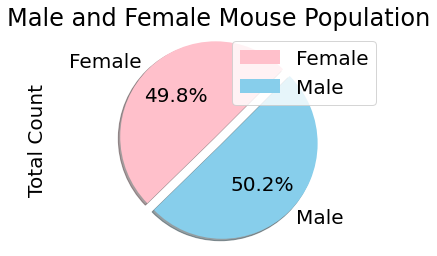

In [121]:
#  Generate a pie plot showing the distribution of Gender
colors = ['pink', 'skyblue']
explode = (0.1, 0)
plot_gender = mouse_gender.plot.pie(colors = colors, startangle=45, subplots=True,  explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male and Female Mouse Population')
plt.axis("equal")

## Display the graph
plt.show()

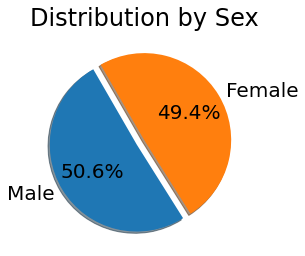

In [118]:

# Get Labels for our pie chart from the index values of the groupby dataframe
# Identify distribution of data by sex
# format the "Percentage of Sex" 
combined_data['Sex'] = combined_data['Sex']
data = combined_data['Sex'].value_counts()

# The values of each section of the pie chart
mouse_gender.columns = ["Total Count"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(data, labels=data.index.values, explode = explode, shadow=True, autopct="%1.1f%%", startangle=120)
plt.title('Distribution by Sex')

# Display resulting plot
plt.show()

## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
## Create a subset of the combined_data dataframe where 'Drug Regimen' 

# Create a list of the four drugs to examine
four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Slice the original combined_data dataframe using the list of four drugs
four_drugs = combined_data[combined_data['Drug Regimen'].isin(four_drug_list)]

# View the dataframe
four_drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [68]:
# Then groupby 'Mouse ID' and use the .agg method and chain a round method to output 3 digits after the zero
four_last_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
        # Get the last value of the 'Tumor Volume (mm3)' column using a lambda function selecting the element in -1 position
        Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

# View the groupby dataframe
four_last_tumor

Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159
...                                ...
Ramicane     s508               30.276
             u196               40.668
             w678               43.166
             y449               44.183
             z578               30.639

[100 rows x 1 columns]

In [69]:
# Reshape dataframe with Drug Regimen as columns by using unstack, also move Last_tumor_size to index using stack
four_last_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)
# View the result to confirm transpose
four_last_tumor_unstack.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Last_tumor_size,NaN,NaN,67.973,NaN
a251,Last_tumor_size,NaN,NaN,65.526,NaN
a275,Last_tumor_size,NaN,62.999,NaN,NaN
a411,Last_tumor_size,NaN,NaN,NaN,38.408
a444,Last_tumor_size,NaN,NaN,NaN,43.048


In [108]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.

# Set counter to 0 which is used to only print dividing line at top of output
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []

# Do quartile calculations for each drug
for drug in four_drug_list:
    quartiles = four_last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.12 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.16 
Values below 36.83 for Infubinol could be outliers.
Values above 82.75 for Infubinol could be outliers.
-----

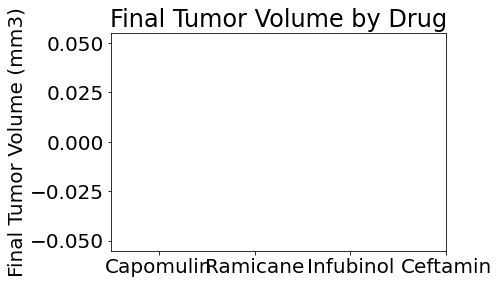

In [122]:
# Edit outliers on boxplot for visibility
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(drug_values, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

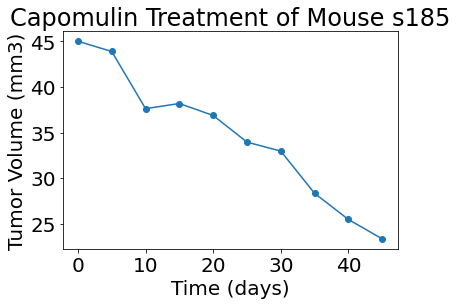

In [74]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Identify data points of a mouse treated with Capomulin
mouse = data_combined.loc[data_combined['Mouse ID'] == 's185']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

# Display plot
plt.show()

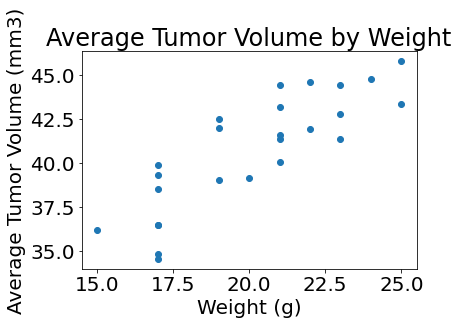

In [88]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Isolate cases that only use the Capomulin regimen
capomulin_df = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()


In [101]:
# Calculate the correlation coefficient and linear regression model 
capomulin_df = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.53


In [104]:
x_values = combined_data['Weight (g)']
y_values = combined_data['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:1.3325187223189532
intercept:16.252698110717155
rvalue (Correlation coefficient):0.5874984592659994
pandas (Correlation coefficient):0.53
stderr:0.042207561995586715
y = 1.33x + 16.25


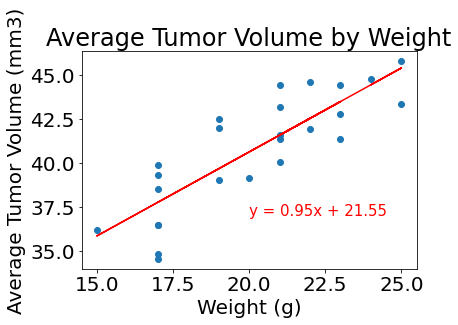

In [106]:
# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

## display de graph of linear regression 
plt.show()